## Graph Learning Data Exploration

We will be looking at the **IMBD-BINARY** and the **MUTAG** graph dataset. Both are graph level classification tasks --> notice that this is a simple task doing binary classification, no graph structure or realtionship need to br predicted, just given a graph (node feature, edge connections, edge features) and its labels (target class), can we predict this class information.

- **MUTAG**
    - Task: Predict if a molecule is mutagenic or not
    - Input: One graph = one molecule (each elements are the nodes, connection between them as edges)
    - Output: One label per graph (0 or 1)

- **IMDB-BINARY**
    - Task: Predict if a movie is Action or Romance genre
    - Input: One graph = one movie (actors as nodes, co-starring as edges)
    - Output: One label per graph (0 or 1)

In [35]:
import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
imdb = TUDataset(root='./data', name='IMDB-BINARY')
print(f"IMDB-BINARY Dataset:")
print(f"  Number of graphs: {len(imdb)}")
print(f"  Number of classes: {imdb.num_classes}")
print(f"  First graph - Nodes: {imdb[0].num_nodes}, Edges: {imdb[0].num_edges}")

mutag = TUDataset(root='./data', name='MUTAG')
print(f"MUTAG Dataset:")
print(f"  Number of graphs: {len(mutag)}")
print(f"  Number of classes: {mutag.num_classes}")
print(f"  First graph - Nodes: {mutag[0].num_nodes}, Edges: {mutag[0].num_edges}")

Extracting data/IMDB-BINARY/IMDB-BINARY.zip
Processing...
Done!


IMDB-BINARY Dataset:
  Number of graphs: 1000
  Number of classes: 2
  First graph - Nodes: 20, Edges: 146
MUTAG Dataset:
  Number of graphs: 188
  Number of classes: 2
  First graph - Nodes: 17, Edges: 38


Extracting data/MUTAG/MUTAG.zip
Processing...
Done!


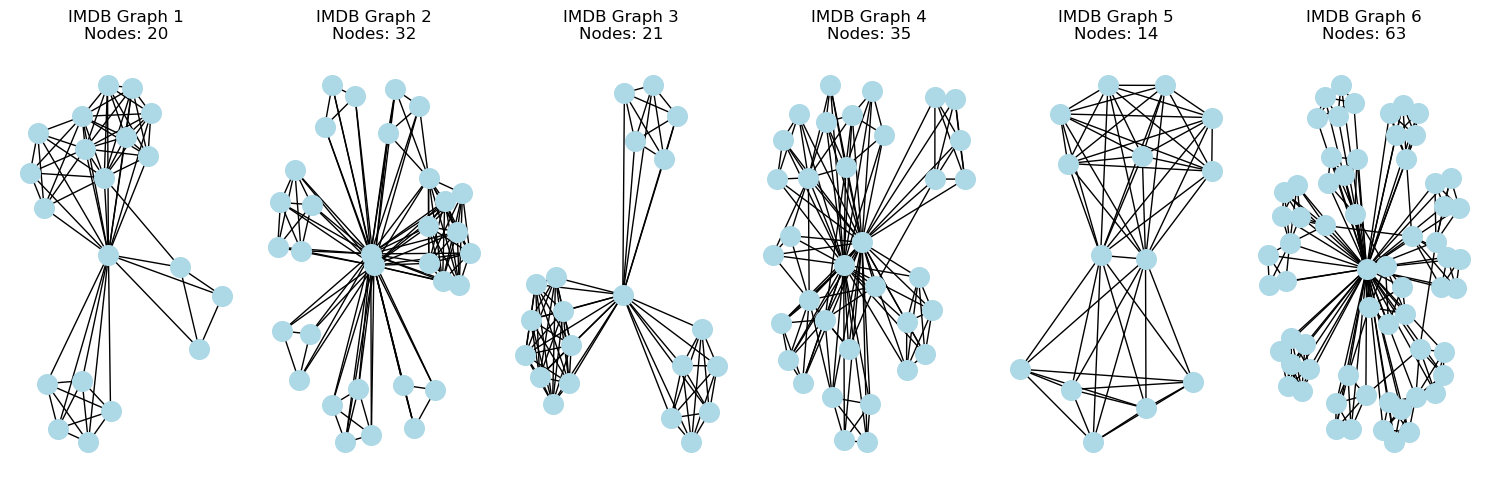

In [21]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    G = to_networkx(imdb[i], to_undirected=True)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color='lightblue', node_size=200, 
            with_labels=False, ax=axes[i])
    axes[i].set_title(f'IMDB Graph {i+1}\nNodes: {imdb[i].num_nodes}')
plt.tight_layout()
plt.show()

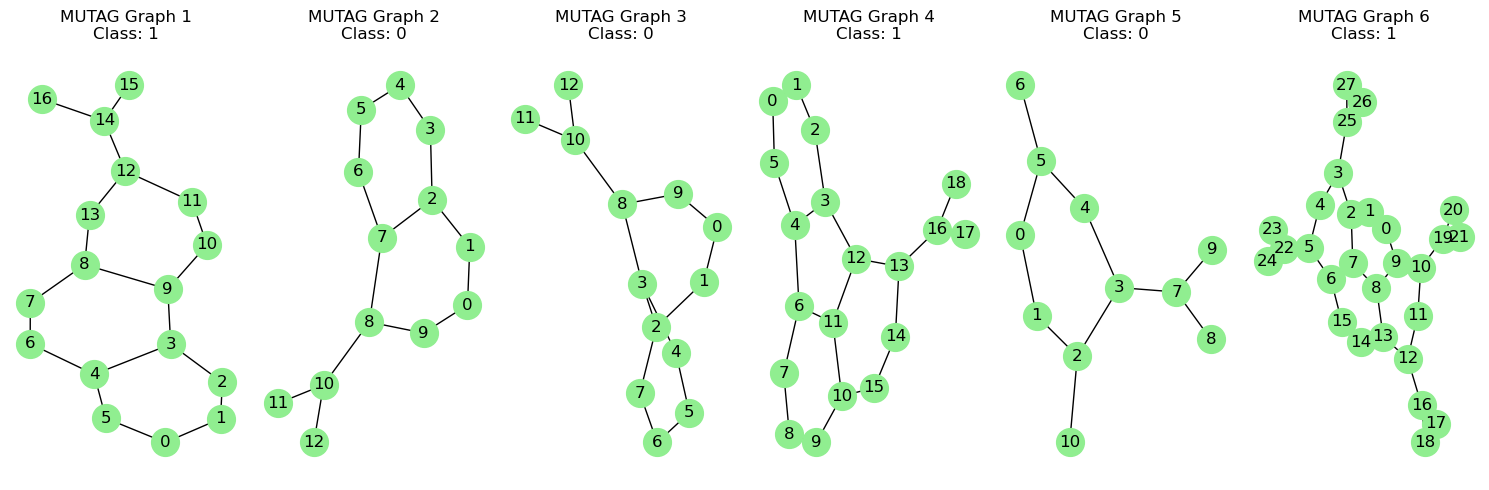

In [20]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i in range(6):
    G = to_networkx(mutag[i], to_undirected=True)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color='lightgreen', node_size=400, 
            with_labels=True, ax=axes[i])
    axes[i].set_title(f'MUTAG Graph {i+1}\nClass: {mutag[i].y.item()}')
plt.tight_layout()
plt.show()


IMDB-BINARY - Graph Size Statistics:
  Nodes - Min: 12, Max: 136, Mean: 19.77, Std: 10.06
  Edges - Min: 52, Max: 2498, Mean: 193.06, Std: 211.20

MUTAG - Graph Size Statistics:
  Nodes - Min: 10, Max: 28, Mean: 17.93, Std: 4.58
  Edges - Min: 20, Max: 66, Mean: 39.59, Std: 11.37


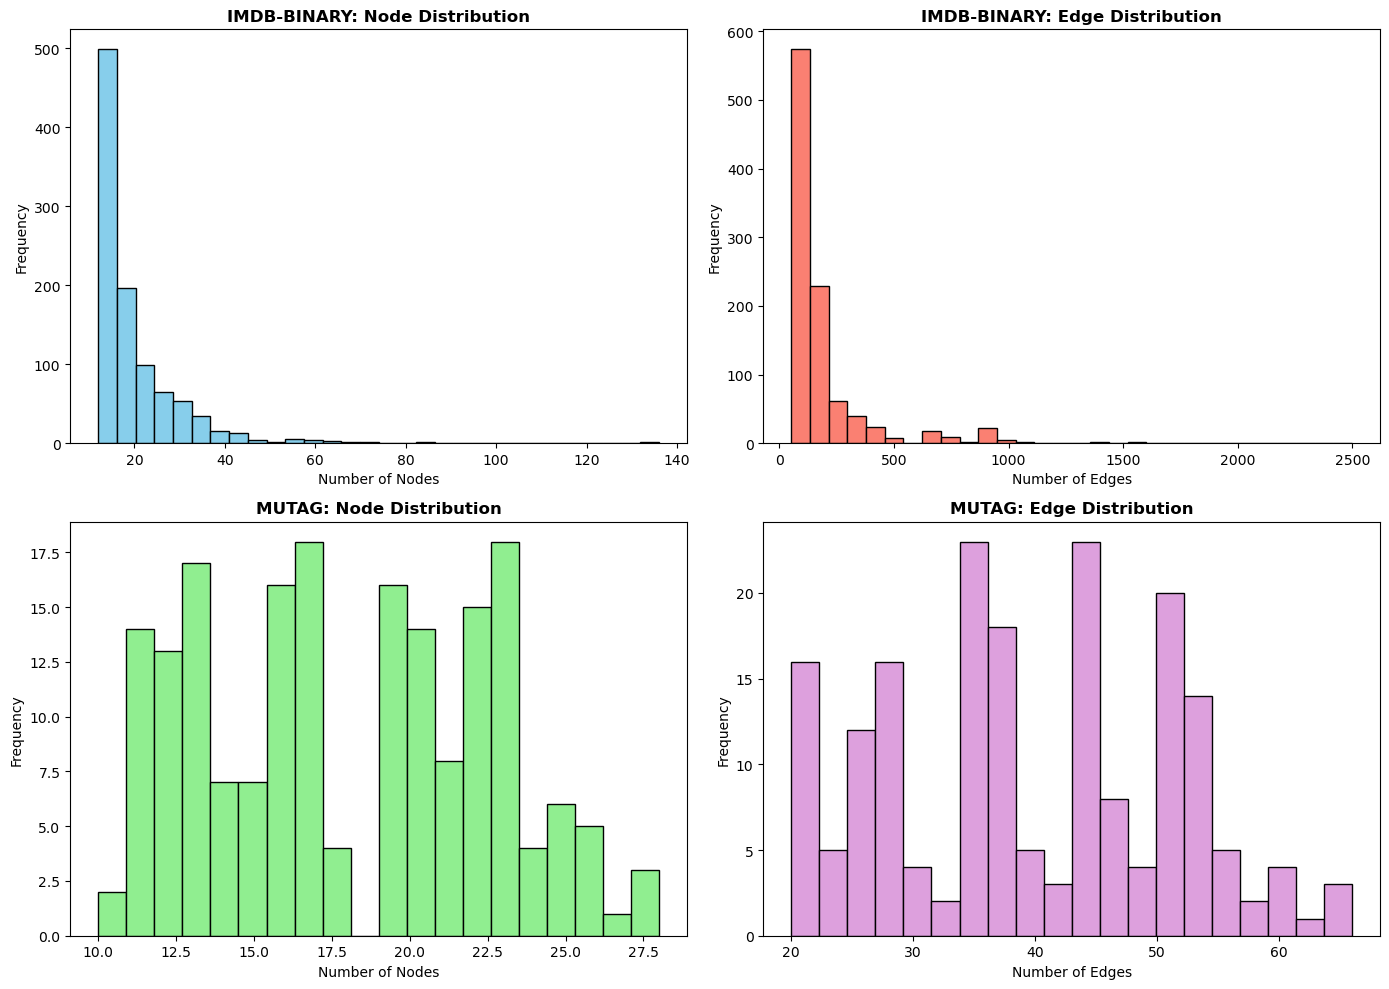

In [12]:
def analyze_graph_sizes(dataset, name):
    num_nodes = [g.num_nodes for g in dataset]
    num_edges = [g.num_edges for g in dataset]
    
    print(f"\n{name} - Graph Size Statistics:")
    print(f"  Nodes - Min: {min(num_nodes)}, Max: {max(num_nodes)}, Mean: {np.mean(num_nodes):.2f}, Std: {np.std(num_nodes):.2f}")
    print(f"  Edges - Min: {min(num_edges)}, Max: {max(num_edges)}, Mean: {np.mean(num_edges):.2f}, Std: {np.std(num_edges):.2f}")
    
    return num_nodes, num_edges

imdb_nodes, imdb_edges = analyze_graph_sizes(imdb, "IMDB-BINARY")
mutag_nodes, mutag_edges = analyze_graph_sizes(mutag, "MUTAG")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(imdb_nodes, bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('IMDB-BINARY: Node Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Nodes')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(imdb_edges, bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_title('IMDB-BINARY: Edge Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Edges')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(mutag_nodes, bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('MUTAG: Node Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Nodes')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(mutag_edges, bins=20, color='plum', edgecolor='black')
axes[1, 1].set_title('MUTAG: Edge Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Edges')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


IMDB-BINARY - Degree Statistics:
  Average Degree: 9.76
  Min Degree: 1
  Max Degree: 135
  Std Degree: 7.43

MUTAG - Degree Statistics:
  Average Degree: 2.21
  Min Degree: 1
  Max Degree: 4
  Std Degree: 0.74


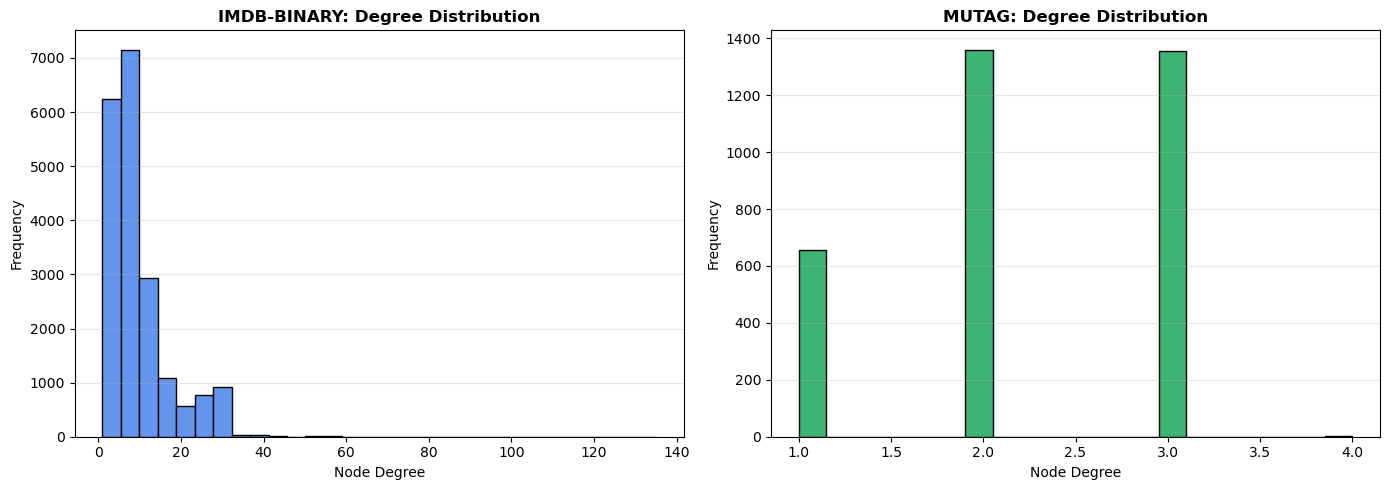

In [17]:
def analyze_degree_statistics(dataset, name):
    all_degrees = []
    for data in dataset:
        G = to_networkx(data, to_undirected=True)
        degrees = [deg for node, deg in G.degree()]
        all_degrees.extend(degrees)
    
    print(f"\n{name} - Degree Statistics:")
    print(f"  Average Degree: {np.mean(all_degrees):.2f}")
    print(f"  Min Degree: {min(all_degrees)}")
    print(f"  Max Degree: {max(all_degrees)}")
    print(f"  Std Degree: {np.std(all_degrees):.2f}")
    
    return all_degrees

imdb_degrees = analyze_degree_statistics(imdb, "IMDB-BINARY")
mutag_degrees = analyze_degree_statistics(mutag, "MUTAG")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(imdb_degrees, bins=30, color='cornflowerblue', edgecolor='black')
axes[0].set_title('IMDB-BINARY: Degree Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Node Degree')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(mutag_degrees, bins=20, color='mediumseagreen', edgecolor='black')
axes[1].set_title('MUTAG: Degree Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Node Degree')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


   Atom types in MUTAG: ['C', 'N', 'O', 'F', 'I', 'Cl', 'Br']
   (Features are one-hot encoded)


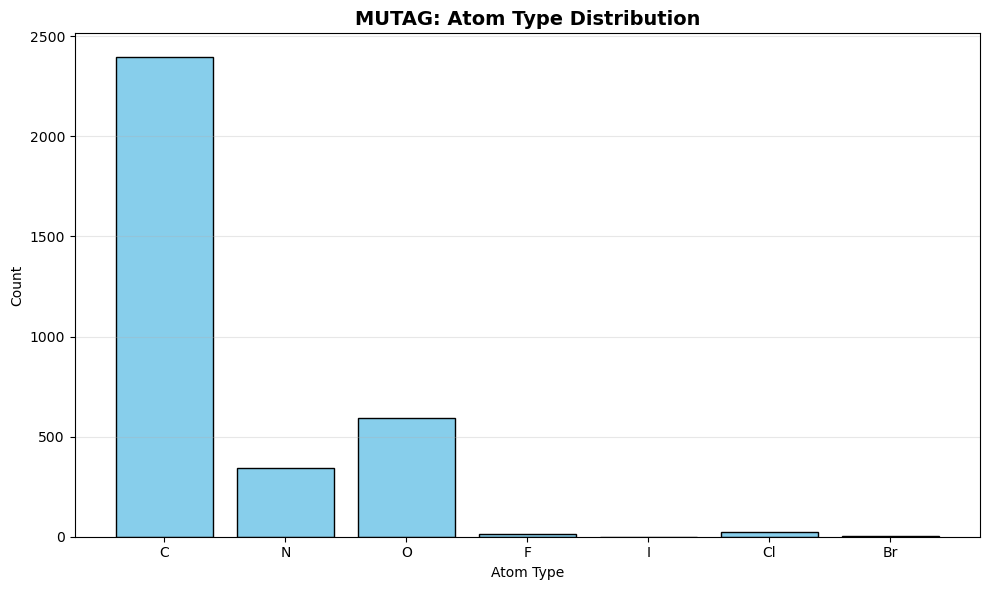

In [31]:
atom_types = ['C', 'N', 'O', 'F', 'I', 'Cl', 'Br']
print(f"\n   Atom types in MUTAG: {atom_types}")
print(f"   (Features are one-hot encoded)")

atom_counts = {atom: 0 for atom in atom_types}

for data in mutag:
    for node_features in data.x:
        atom_idx = torch.argmax(node_features).item()
        if atom_idx < len(atom_types):
            atom_counts[atom_types[atom_idx]] += 1

plt.figure(figsize=(10, 6))
plt.bar(atom_counts.keys(), atom_counts.values(), color='skyblue', edgecolor='black')
plt.title('MUTAG: Atom Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Atom Type')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
node_feature_stats = []
for i, data in enumerate(mutag[:10]):  # First 10 graphs
    feature_sum = data.x.sum(dim=0)
    atom_composition = [atom_types[j] for j in range(len(atom_types)) if feature_sum[j] > 0]
    node_feature_stats.append({
        'Graph': i,
        'Num Nodes': data.num_nodes,
        'Label': data.y.item(),
        'Atoms Present': ', '.join(atom_composition)
    })

df_features = pd.DataFrame(node_feature_stats)
print("\n" + df_features.to_string(index=False))


 Graph  Num Nodes  Label Atoms Present
     0         17      1       C, N, O
     1         13      0       C, N, O
     2         13      0       C, N, O
     3         19      1       C, N, O
     4         11      0    C, N, O, F
     5         28      1       C, N, O
     6         16      0       C, N, O
     7         20      1       C, N, O
     8         12      0       C, N, O
     9         17      1       C, N, O


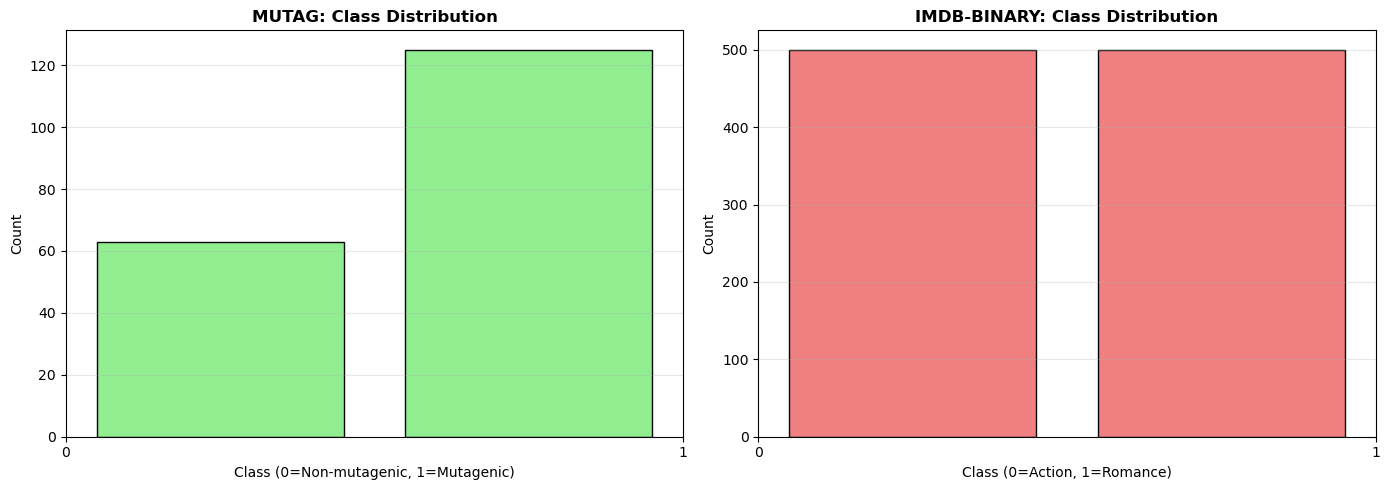

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

mutag_labels = [data.y.item() for data in mutag]
axes[0].hist(mutag_labels, bins=2, color='lightgreen', edgecolor='black', rwidth=0.8)
axes[0].set_title('MUTAG: Class Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Class (0=Non-mutagenic, 1=Mutagenic)')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].grid(axis='y', alpha=0.3)

imdb_labels = [data.y.item() for data in imdb]
axes[1].hist(imdb_labels, bins=2, color='lightcoral', edgecolor='black', rwidth=0.8)
axes[1].set_title('IMDB-BINARY: Class Distribution', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Class (0=Action, 1=Romance)')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Naive Modeling Tasks

In [49]:
import torch.nn.functional as F
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.model_selection import train_test_split
from tqdm import tqdm

torch.manual_seed(42)
np.random.seed(42)

dataset = TUDataset(root='./data', name='MUTAG')
indices = list(range(len(dataset)))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

train_dataset = [dataset[i] for i in train_idx]
test_dataset = [dataset[i] for i in test_idx]

print(f"\nDataset Split:")
print(f"Training graphs: {len(train_dataset)}")
print(f"Test graphs: {len(test_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class SimpleGNN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(SimpleGNN, self).__init__()
        
        # Two GCN layers
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        
        # Fully connected layer for classification
        self.fc = torch.nn.Linear(hidden_dim, num_classes)
    
    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        
        # First GCN layer + ReLU
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        # Second GCN layer + ReLU
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        
        # Global pooling (aggregate node features to graph-level)
        x = global_mean_pool(x, batch)
        
        x = self.fc(x)
        
        return x

model = SimpleGNN(
    num_features=dataset.num_features,
    hidden_dim=128,
    num_classes=dataset.num_classes
)

print("\nModel Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
        total += data.y.size(0)
    
    return total_loss / len(train_loader), correct / total

def test(loader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in loader:
            out = model(data)
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
            total += data.y.size(0)
    
    return correct / total


Dataset Split:
Training graphs: 150
Test graphs: 38

Model Architecture:
SimpleGNN(
  (conv1): GCNConv(7, 128)
  (conv2): GCNConv(128, 128)
  (fc): Linear(in_features=128, out_features=2, bias=True)
)

Total parameters: 17794


In [50]:
epochs = 500
train_losses = []
train_accs = []
test_accs = []

print("Training started...\n")

for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    loss, train_acc = train()
    test_acc = test(test_loader)
    
    train_losses.append(loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    if epoch % 10 == 0:
        tqdm.write(f'Epoch {epoch:03d} | Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}')

print("\nTraining complete!")

Training started...



Training Progress:   2%|▏         | 11/500 [00:01<01:13,  6.65it/s]

Epoch 010 | Loss: 0.5412 | Train Acc: 0.7400 | Test Acc: 0.8158


Training Progress:   4%|▍         | 21/500 [00:03<01:11,  6.68it/s]

Epoch 020 | Loss: 0.5367 | Train Acc: 0.7333 | Test Acc: 0.7895


Training Progress:   6%|▌         | 31/500 [00:04<01:17,  6.03it/s]

Epoch 030 | Loss: 0.5111 | Train Acc: 0.7333 | Test Acc: 0.8158


Training Progress:   8%|▊         | 40/500 [00:06<01:30,  5.08it/s]

Epoch 040 | Loss: 0.5212 | Train Acc: 0.7667 | Test Acc: 0.8158


Training Progress:  10%|█         | 51/500 [00:08<01:07,  6.69it/s]

Epoch 050 | Loss: 0.5189 | Train Acc: 0.7600 | Test Acc: 0.8158


Training Progress:  12%|█▏        | 60/500 [00:09<01:21,  5.39it/s]

Epoch 060 | Loss: 0.5083 | Train Acc: 0.7400 | Test Acc: 0.7895


Training Progress:  14%|█▍        | 71/500 [00:11<01:03,  6.71it/s]

Epoch 070 | Loss: 0.5159 | Train Acc: 0.7600 | Test Acc: 0.8421


Training Progress:  16%|█▌        | 81/500 [00:12<00:58,  7.19it/s]

Epoch 080 | Loss: 0.4996 | Train Acc: 0.7467 | Test Acc: 0.8421


Training Progress:  18%|█▊        | 91/500 [00:14<00:58,  7.03it/s]

Epoch 090 | Loss: 0.5197 | Train Acc: 0.7933 | Test Acc: 0.8158


Training Progress:  20%|██        | 101/500 [00:15<01:09,  5.74it/s]

Epoch 100 | Loss: 0.4866 | Train Acc: 0.7533 | Test Acc: 0.8158


Training Progress:  22%|██▏       | 111/500 [00:17<01:01,  6.29it/s]

Epoch 110 | Loss: 0.4906 | Train Acc: 0.7533 | Test Acc: 0.7895


Training Progress:  24%|██▍       | 121/500 [00:19<00:51,  7.34it/s]

Epoch 120 | Loss: 0.5007 | Train Acc: 0.7733 | Test Acc: 0.8158


Training Progress:  26%|██▌       | 130/500 [00:20<01:31,  4.04it/s]

Epoch 130 | Loss: 0.5074 | Train Acc: 0.7867 | Test Acc: 0.8421


Training Progress:  28%|██▊       | 140/500 [00:22<01:12,  4.99it/s]

Epoch 140 | Loss: 0.4826 | Train Acc: 0.7867 | Test Acc: 0.8421


Training Progress:  30%|███       | 151/500 [00:24<00:50,  6.88it/s]

Epoch 150 | Loss: 0.4817 | Train Acc: 0.7733 | Test Acc: 0.8684


Training Progress:  32%|███▏      | 161/500 [00:25<00:46,  7.36it/s]

Epoch 160 | Loss: 0.4806 | Train Acc: 0.8000 | Test Acc: 0.8158


Training Progress:  34%|███▍      | 171/500 [00:27<00:57,  5.70it/s]

Epoch 170 | Loss: 0.4846 | Train Acc: 0.7933 | Test Acc: 0.8421


Training Progress:  36%|███▌      | 181/500 [00:29<00:51,  6.15it/s]

Epoch 180 | Loss: 0.4668 | Train Acc: 0.8000 | Test Acc: 0.8158


Training Progress:  38%|███▊      | 191/500 [00:30<00:43,  7.06it/s]

Epoch 190 | Loss: 0.4743 | Train Acc: 0.7800 | Test Acc: 0.8158


Training Progress:  40%|████      | 201/500 [00:32<01:03,  4.74it/s]

Epoch 200 | Loss: 0.4685 | Train Acc: 0.8067 | Test Acc: 0.8684


Training Progress:  42%|████▏     | 211/500 [00:34<00:44,  6.48it/s]

Epoch 210 | Loss: 0.4538 | Train Acc: 0.8067 | Test Acc: 0.8421


Training Progress:  44%|████▍     | 221/500 [00:36<00:51,  5.40it/s]

Epoch 220 | Loss: 0.4444 | Train Acc: 0.8133 | Test Acc: 0.8421


Training Progress:  46%|████▌     | 231/500 [00:37<00:45,  5.87it/s]

Epoch 230 | Loss: 0.4584 | Train Acc: 0.8067 | Test Acc: 0.8684


Training Progress:  48%|████▊     | 241/500 [00:39<00:38,  6.72it/s]

Epoch 240 | Loss: 0.4555 | Train Acc: 0.8133 | Test Acc: 0.8947


Training Progress:  50%|█████     | 250/500 [00:40<00:45,  5.44it/s]

Epoch 250 | Loss: 0.4523 | Train Acc: 0.8200 | Test Acc: 0.8684


Training Progress:  52%|█████▏    | 261/500 [00:42<00:42,  5.65it/s]

Epoch 260 | Loss: 0.4320 | Train Acc: 0.8133 | Test Acc: 0.8947


Training Progress:  54%|█████▍    | 271/500 [00:44<00:40,  5.59it/s]

Epoch 270 | Loss: 0.4465 | Train Acc: 0.8267 | Test Acc: 0.8947


Training Progress:  56%|█████▌    | 281/500 [00:46<00:37,  5.87it/s]

Epoch 280 | Loss: 0.4334 | Train Acc: 0.8267 | Test Acc: 0.9211


Training Progress:  58%|█████▊    | 291/500 [00:48<00:34,  5.98it/s]

Epoch 290 | Loss: 0.4380 | Train Acc: 0.8200 | Test Acc: 0.8684


Training Progress:  60%|██████    | 301/500 [00:49<00:35,  5.65it/s]

Epoch 300 | Loss: 0.4276 | Train Acc: 0.8200 | Test Acc: 0.9211


Training Progress:  62%|██████▏   | 310/500 [00:51<00:35,  5.34it/s]

Epoch 310 | Loss: 0.4301 | Train Acc: 0.8200 | Test Acc: 0.8947


Training Progress:  64%|██████▍   | 320/500 [00:53<00:32,  5.59it/s]

Epoch 320 | Loss: 0.4284 | Train Acc: 0.8400 | Test Acc: 0.8947


Training Progress:  66%|██████▌   | 330/500 [00:55<00:31,  5.38it/s]

Epoch 330 | Loss: 0.4217 | Train Acc: 0.8267 | Test Acc: 0.8947


Training Progress:  68%|██████▊   | 341/500 [00:57<00:22,  7.07it/s]

Epoch 340 | Loss: 0.4489 | Train Acc: 0.8133 | Test Acc: 0.9211


Training Progress:  70%|███████   | 351/500 [00:58<00:22,  6.63it/s]

Epoch 350 | Loss: 0.4207 | Train Acc: 0.8200 | Test Acc: 0.9211


Training Progress:  72%|███████▏  | 361/500 [01:00<00:24,  5.58it/s]

Epoch 360 | Loss: 0.4297 | Train Acc: 0.8333 | Test Acc: 0.8947


Training Progress:  74%|███████▍  | 371/500 [01:02<00:23,  5.46it/s]

Epoch 370 | Loss: 0.4395 | Train Acc: 0.8200 | Test Acc: 0.8947


Training Progress:  76%|███████▌  | 381/500 [01:03<00:20,  5.83it/s]

Epoch 380 | Loss: 0.4340 | Train Acc: 0.8267 | Test Acc: 0.8158


Training Progress:  78%|███████▊  | 391/500 [01:05<00:17,  6.13it/s]

Epoch 390 | Loss: 0.4259 | Train Acc: 0.8067 | Test Acc: 0.8421


Training Progress:  80%|████████  | 401/500 [01:07<00:13,  7.32it/s]

Epoch 400 | Loss: 0.4202 | Train Acc: 0.8267 | Test Acc: 0.8684


Training Progress:  82%|████████▏ | 411/500 [01:08<00:14,  6.34it/s]

Epoch 410 | Loss: 0.4029 | Train Acc: 0.8533 | Test Acc: 0.8684


Training Progress:  84%|████████▍ | 420/500 [01:10<00:14,  5.46it/s]

Epoch 420 | Loss: 0.4057 | Train Acc: 0.8333 | Test Acc: 0.8947


Training Progress:  86%|████████▌ | 431/500 [01:12<00:11,  5.77it/s]

Epoch 430 | Loss: 0.4293 | Train Acc: 0.8133 | Test Acc: 0.9211


Training Progress:  88%|████████▊ | 441/500 [01:13<00:09,  6.05it/s]

Epoch 440 | Loss: 0.4258 | Train Acc: 0.8400 | Test Acc: 0.9211


Training Progress:  90%|█████████ | 450/500 [01:15<00:10,  4.57it/s]

Epoch 450 | Loss: 0.4122 | Train Acc: 0.8267 | Test Acc: 0.9211


Training Progress:  92%|█████████▏| 460/500 [01:17<00:08,  4.45it/s]

Epoch 460 | Loss: 0.4068 | Train Acc: 0.8333 | Test Acc: 0.8684


Training Progress:  94%|█████████▍| 470/500 [01:20<00:08,  3.53it/s]

Epoch 470 | Loss: 0.4122 | Train Acc: 0.8467 | Test Acc: 0.9211


Training Progress:  96%|█████████▌| 481/500 [01:22<00:02,  6.51it/s]

Epoch 480 | Loss: 0.4306 | Train Acc: 0.8200 | Test Acc: 0.9211


Training Progress:  98%|█████████▊| 491/500 [01:23<00:01,  6.57it/s]

Epoch 490 | Loss: 0.4135 | Train Acc: 0.8333 | Test Acc: 0.9211


Training Progress: 100%|██████████| 500/500 [01:25<00:00,  5.86it/s]

Epoch 500 | Loss: 0.4184 | Train Acc: 0.8467 | Test Acc: 0.9211

Training complete!


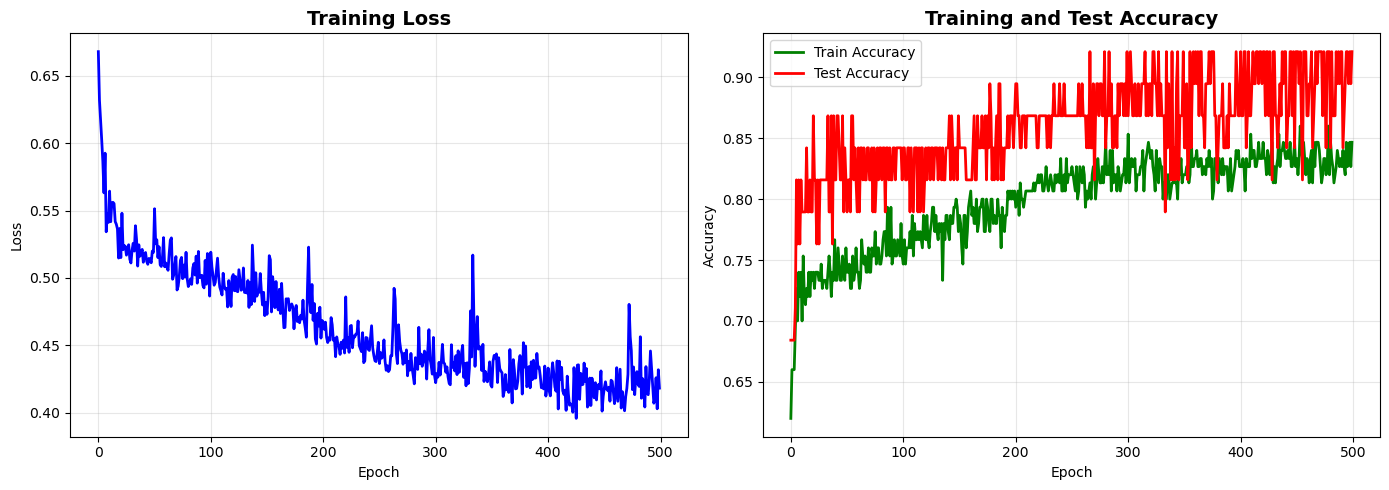

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(train_losses, color='blue', linewidth=2)
axes[0].set_title('Training Loss', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid(alpha=0.3)

axes[1].plot(train_accs, label='Train Accuracy', color='green', linewidth=2)
axes[1].plot(test_accs, label='Test Accuracy', color='red', linewidth=2)
axes[1].set_title('Training and Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [54]:
final_train_acc = test(train_loader)
final_test_acc = test(test_loader)

print("\n" + "="*50)
print("FINAL RESULTS")
print("="*50)
print(f"Final Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Test Accuracy: {final_test_acc:.4f} ({final_test_acc*100:.2f}%)")
print("="*50)

model.eval()
print("\n" + "="*50)
print("PREDICTIONS ON TEST EXAMPLES")
print("="*50)

with torch.no_grad():
    for i in range(5):
        data = test_dataset[i]
        data_batch = next(iter(DataLoader([data], batch_size=1)))
        out = model(data_batch)
        pred = out.argmax(dim=1).item()
        true_label = data.y.item()
        
        print(f"\nGraph {i}:")
        print(f"  Nodes: {data.num_nodes}, Edges: {data.num_edges}")
        print(f"  True Label: {true_label} ({'Mutagenic' if true_label == 1 else 'Non-mutagenic'})")
        print(f"  Predicted: {pred} ({'Mutagenic' if pred == 1 else 'Non-mutagenic'})")
        print(f"  Correct: {'✓' if pred == true_label else '✗'}")


FINAL RESULTS
Final Training Accuracy: 0.8333 (83.33%)
Final Test Accuracy: 0.9211 (92.11%)

PREDICTIONS ON TEST EXAMPLES

Graph 0:
  Nodes: 22, Edges: 50
  True Label: 1 (Mutagenic)
  Predicted: 1 (Mutagenic)
  Correct: ✓

Graph 1:
  Nodes: 22, Edges: 50
  True Label: 1 (Mutagenic)
  Predicted: 1 (Mutagenic)
  Correct: ✓

Graph 2:
  Nodes: 13, Edges: 28
  True Label: 0 (Non-mutagenic)
  Predicted: 0 (Non-mutagenic)
  Correct: ✓

Graph 3:
  Nodes: 22, Edges: 50
  True Label: 1 (Mutagenic)
  Predicted: 1 (Mutagenic)
  Correct: ✓

Graph 4:
  Nodes: 23, Edges: 54
  True Label: 1 (Mutagenic)
  Predicted: 1 (Mutagenic)
  Correct: ✓


---